# 100 Men vs 1 Gorilla

## Simple Gorilla vs Human round

In [1]:
from simulation_utils import * 
run_single_round_simulation(print_statement=True)

Human vs Gorilla, round 0
Human has resistance =  1.1529557218529203, he gets hit by strength = 11.171794334423018
Human has now resistance 0.9107132375433585
Human vs Gorilla, round 1
Human has resistance =  0.9107132375433585, he gets hit by strength = 11.171794334423018
Human has now resistance 0.6040361773592209
Human vs Gorilla, round 2
Human has resistance =  0.6040361773592209, he gets hit by strength = 11.171794334423018
Human has now resistance 0.14165516637139963
Human vs Gorilla, round 3
Human has resistance =  0.14165516637139963, he gets hit by strength = 11.171794334423018
Human has now resistance -1.8299980074232234
Human is dead after 4 rounds


(4, 1.1529557218529203, 11.171794334423018)

## Multiple rounds of Gorilla vs Human

In [7]:
import pandas as pd
import seaborn as sns

N = 10_000
round_simulations, human_resistances, gorilla_strengths = run_multiple_round_simulations(print_statement=False, num_simulations=N)
simulation_data = []
for i in range(N):
    simulation_data.append([round_simulations[i], human_resistances[i], gorilla_strengths[i]])
simulation_data = pd.DataFrame(simulation_data)
simulation_data.columns = ['Number Of Rounds', 'Human Resistance', 'Gorilla Strength']

Plotting:

/Users/pieropaialunga/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pieropaialunga/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pieropaialunga/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


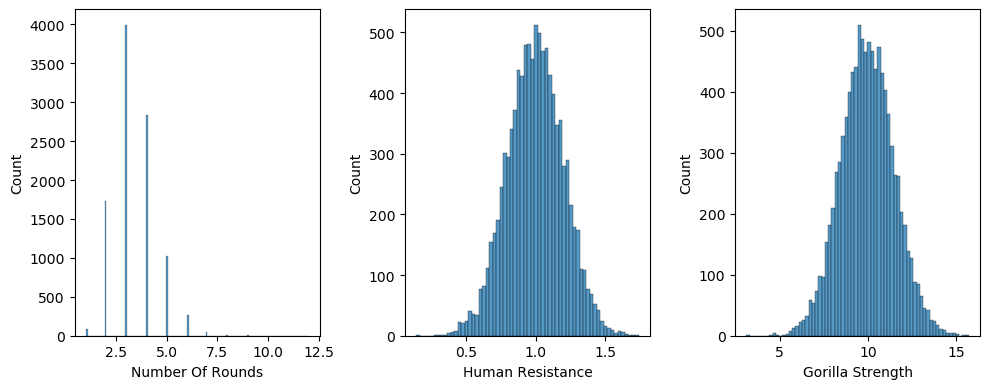

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
sns.histplot(simulation_data['Number Of Rounds'].astype('int'))
plt.subplot(1,3,2)
sns.histplot(simulation_data['Human Resistance'])
plt.subplot(1,3,3)
sns.histplot(simulation_data['Gorilla Strength'])
plt.tight_layout()

In [5]:
from human_population import HumanPopulation
population = HumanPopulation(batch_number=5, strategy='strength_first')
batch_population_zero = population.batches[0]

In [21]:
from human_population import HumanPopulation
from gorilla import Gorilla
population = HumanPopulation(strategy='fitness_first',batch_number=5)
gorilla = Gorilla()
gorilla_health = []
number_of_humans = []
for i in range(10000):
    number_of_humans.append(population.remaining_men)
    population.take_damage(gorilla=gorilla, print_statement=False)
    gorilla.take_damage_batch(population=population, batch_factor=False)
    gorilla_health.append(gorilla.resistance)
    if gorilla.alive is False or gorilla.resistance < 0:
        print('Humans have beaten the gorilla')
        break
    if population.no_more_men is True:
        print('Gorilla has eliminated all humans')
        break
population = HumanPopulation(strategy='strength_first',batch_number=5)
gorilla = Gorilla()
gorilla_health_batch_factor = []
number_of_humans_batch_factor = []
for i in range(10000):
    number_of_humans_batch_factor.append(population.remaining_men)
    population.take_damage(gorilla=gorilla, print_statement=False)
    gorilla.take_damage_batch(population=population, batch_factor=True)
    gorilla_health_batch_factor.append(gorilla.resistance)
    if gorilla.alive is False or gorilla.resistance < 0:
        print('Humans have beaten the gorilla')
        break
    if population.no_more_men is True:
        print('Gorilla has eliminated all humans')
        break

Gorilla has eliminated all humans
Humans have beaten the gorilla


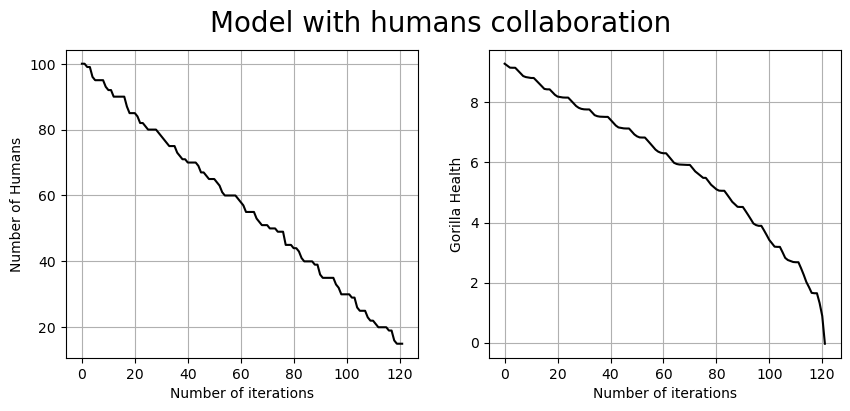

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.suptitle('Model with humans collaboration',fontsize = 20)
plt.subplot(1,2,1)
plt.plot(number_of_humans_batch_factor, color ='k')
plt.xlabel('Number of iterations')
plt.ylabel('Number of Humans')
plt.grid()
plt.subplot(1,2,2)
plt.plot(gorilla_health_batch_factor, color = 'k')
plt.xlabel('Number of iterations')
plt.ylabel('Gorilla Health')
plt.grid()